In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
! wget https://www.statlearning.com/s/Advertising.csv

--2024-03-17 17:27:11--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2024-03-17 17:27:12--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

In [3]:
# Read in a CSV file
adv = pd.read_csv('Advertising.csv')

In [5]:
x = adv['TV']
y = adv['sales']
n = len(x)

In [6]:
# The way from the book
xBar = np.sum(x)/n
yBar = np.sum(y)/n
Bookb1 = np.sum( (x-xBar)*(y-yBar) )/np.sum( (x-xBar)**2 )
Bookb0 = yBar - Bookb1*xBar

In [11]:
# The standard way in Python
myFit = sm.OLS(y, sm.add_constant(x)).fit()
Rb0 = myFit.params['const']
Rb1 = myFit.params['TV']

const    7.032594
TV       0.047537
dtype: float64


In [12]:
# This function creates a n-by-2 matrix where every entry is 1.
X = np.ones((n,2))
X[:,1] = x

In [13]:
# This is the Python equivalent of the R dot product operator
XTXi = np.linalg.inv(X.T.dot(X)).dot(X.T)

In [14]:
# This is the matrix solution of the linear least squares equation
B = XTXi.dot(y)

In [15]:
# These are the slope and intercept of the line of interest.
Matrixb0 = B[0]
Matrixb1 = B[1]

In [16]:
# The intercepts are all the same!  And they match Table 3.1 in
# the book.  In fact, the last digit in the book is rounded
# incorrectly :-)
print(Bookb0, Rb0, Matrixb0)

7.0325935491276965 7.032593549127698 7.032593549127698


In [17]:
# The slopes are all the same!  And they match Table 3.1 in
# the book.
print(Bookb1, Rb1, Matrixb1)

0.047536640433019736 0.047536640433019764 0.047536640433019736


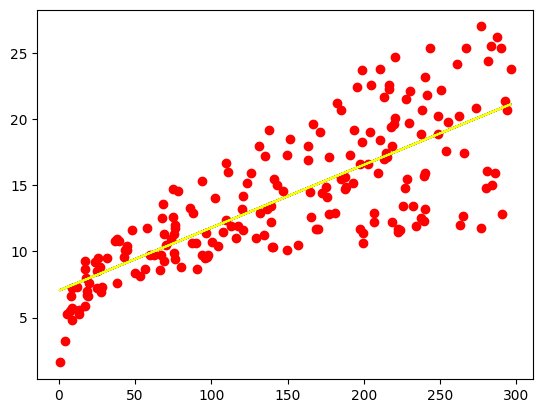

In [18]:
# The regression lines all lay right on top of each other!  I guess
# we got the formulas correct...
plt.scatter(x, y, color='red')
plt.plot(x, Bookb0 + Bookb1 * x, color='blue')
plt.plot(x, Rb0 + Rb1 * x, color='green')
plt.plot(x, Matrixb0 + Matrixb1 * x, color='yellow')
plt.show()